##  자기조직화지도(Self-Organizing Map, SOM)

1. 개념
- 대뇌피질과 시각피질의 학습 과정을 모델화한 인공신경망으로써 자율 학습에 의한 클러스터링을 수행하는 알고리즘이다.



* SOM 은 우선 Map size 를 설정해줍니다. (* 군집분석으로 SOM을 사용할 때에는 군집의 수를 차원의 수로 맞추어 주어야 합니다. )
<br><br>
* 이제 이 Default Map 을 조금씩 수정해서(학습해서 = fit) 데이터 분포 형태에 Map 을 근사시킵니다. 
<br><br>
 
 ![image-2.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_mean_shift_001.png)

### 예제 : iris_data를 som으로 군집분석 해보세요.

In [1]:
# 데이터 로드
import pandas as pd
import numpy as np
iris = pd.read_csv('C:/adp/data/iris.csv')
iris

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
y = iris['target']
X = iris.drop('target',axis=1)

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
X = scaler.fit_transform(X)

In [4]:
X 

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [7]:
# sklearn의 모든 분류기와 마찬가지로 SOM 인스턴스를 빌드하고 SOM .fit()에 맞게 데이터 호출 
# Iris Dataset에 3개의 클래스가 있다는 것을 이미 알고 있으므로 
# 자체 구성 맵에 3 x 1 구조를 사용하지만 실제로는 데이터에 가장 적합한 것을 찾기 위해 다른 구조를 시도해 봐야함 

# !pip install sklearn-som
from sklearn_som.som import SOM

In [8]:
help(SOM)

Help on class SOM in module sklearn_som.som:

class SOM(builtins.object)
 |  SOM(m=3, n=3, dim=3, lr=1, sigma=1, max_iter=3000, random_state=None)
 |  
 |  The 2-D, rectangular grid self-organizing map class using Numpy.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, m=3, n=3, dim=3, lr=1, sigma=1, max_iter=3000, random_state=None)
 |      Parameters
 |      ----------
 |      m : int, default=3
 |          The shape along dimension 0 (vertical) of the SOM.
 |      n : int, default=3
 |          The shape along dimesnion 1 (horizontal) of the SOM.
 |      dim : int, default=3
 |          The dimensionality (number of features) of the input space.
 |      lr : float, default=1
 |          The initial step size for updating the SOM weights.
 |      sigma : float, optional
 |          Optional parameter for magnitude of change to each weight. Does not
 |          update over training (as does learning rate). Higher values mean
 |          more aggressive updates to weights.
 |    

In [9]:
iris_som = SOM(m=3, n=1, dim=4)
iris_som.fit(X,epochs=100)

In [10]:
predictions= iris_som.predict(X)
predictions

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [11]:
iris["cluster"] = predictions

In [12]:
iris

,sepal length,sepal width,petal length,petal width,target,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5.0,3.6,1.4,0.2,Iris-setosa,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


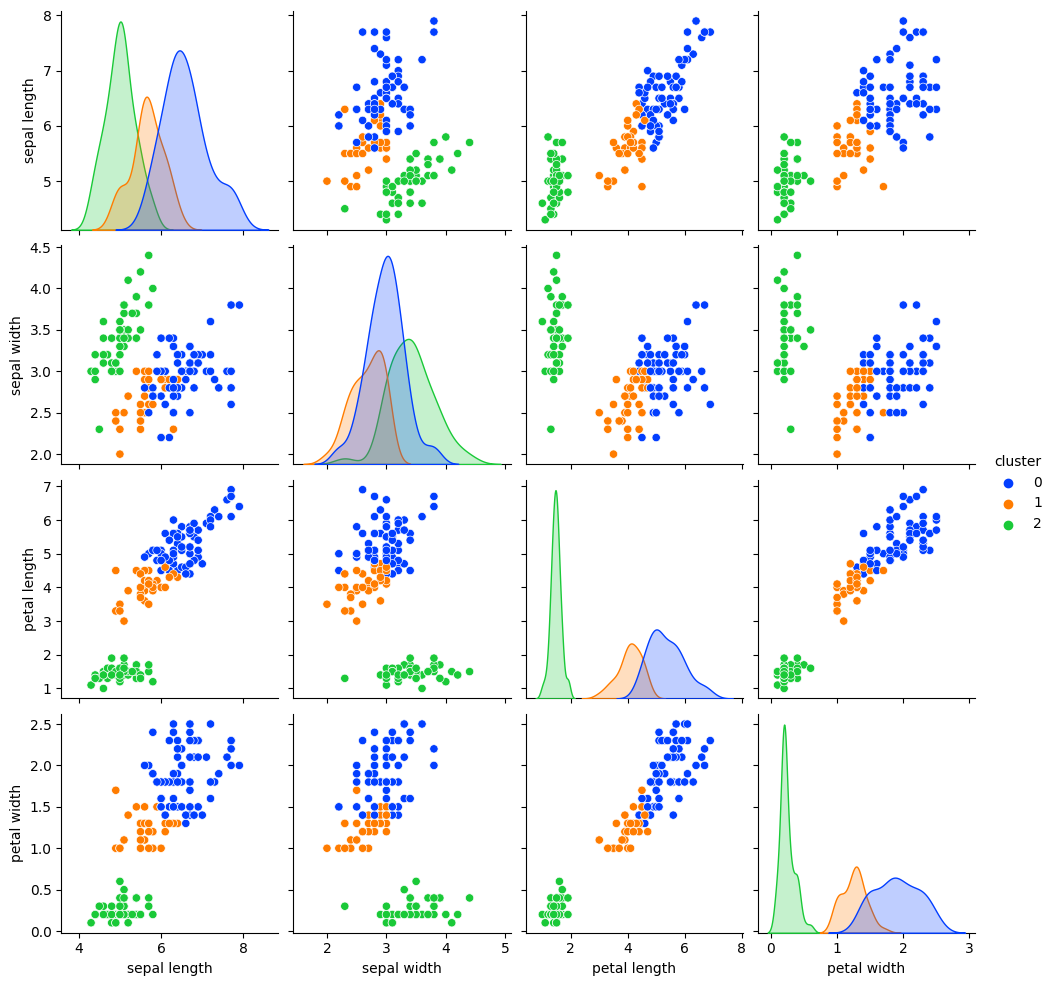

In [13]:
# 원본 target으로 시각화 
# 군집결과 시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(iris,
             diag_kind='kde',
             hue="cluster",
#            corner = True,  #직각삼각형 모양으로 산점도 행렬 만드려면 주석해제
             palette='bright')
plt.show()

### 17회 기출 
* 데이터를 7:3으로 나누어라 
* train 데이터셋을 som 알고리즘으로 군집화하고 test데이터에 대한 오분류표를 구하라 

In [14]:
iris = iris.drop("cluster", axis = 1)
iris.tail()

,sepal length,sepal width,petal length,petal width,target
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,test_size=0.3, random_state=2021)

In [18]:
som = SOM(m=3, n=1, dim=4)
som.fit(X_train)

In [20]:
y_pred = som.predict(X_test)
y_pred

array([0, 2, 1, 2, 0, 0, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 1, 1, 2, 1, 2, 0,
       0, 2, 2, 1, 2, 2, 0, 0, 2, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 2, 2, 0,
       2], dtype=int64)

In [23]:
result = pd.DataFrame() 
result['y_test'] = y_test 
result['y_pred'] = y_pred
result

,y_test,y_pred
6,Iris-setosa,0
148,Iris-virginica,2
89,Iris-versicolor,1
116,Iris-virginica,2
12,Iris-setosa,0
33,Iris-setosa,0
67,Iris-versicolor,1
119,Iris-virginica,1
30,Iris-setosa,0
59,Iris-versicolor,1


In [24]:
result.loc[result['y_test']=='Iris-setosa','target_num'] = 0
result.loc[result['y_test']=='Iris-virginica','target_num'] = 2
result.loc[result['y_test']=='Iris-versicolor','target_num'] = 1

In [25]:
result

,y_test,y_pred,target_num
6,Iris-setosa,0,0.0
148,Iris-virginica,2,2.0
89,Iris-versicolor,1,1.0
116,Iris-virginica,2,2.0
12,Iris-setosa,0,0.0
33,Iris-setosa,0,0.0
67,Iris-versicolor,1,1.0
119,Iris-virginica,1,2.0
30,Iris-setosa,0,0.0
59,Iris-versicolor,1,1.0


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

In [27]:
accuracy_score(result['target_num'], result['y_pred'])

0.8888888888888888

In [28]:
confusion_matrix(result['target_num'], result['y_pred'])

array([[15,  0,  0],
       [ 0, 11,  4],
       [ 0,  1, 14]], dtype=int64)

In [29]:
print(classification_report(result['target_num'], result['y_pred']))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       0.92      0.73      0.81        15
         2.0       0.78      0.93      0.85        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45

